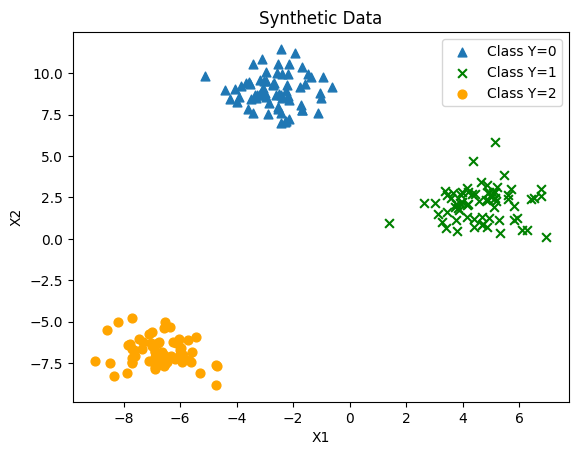

In [1]:
# Import libraries
from sklearn.datasets import make_blobs
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Function to plot dendrogram
def plot_dendrogram(model, **kwargs):
    fig = plt.figure(figsize=(20, 3))
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)

    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # Leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_, counts]).astype(float)

    # Plot dendrogram
    dendrogram(linkage_matrix, **kwargs)

# Generate synthetic data
X, y = make_blobs(n_samples=200, centers=3, random_state=42)

# Plot the original data distribution
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Class Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Class Y=1", c="green", marker="x")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Class Y=2", c="orange", marker="o")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Synthetic Data")
plt.legend()
plt.show()

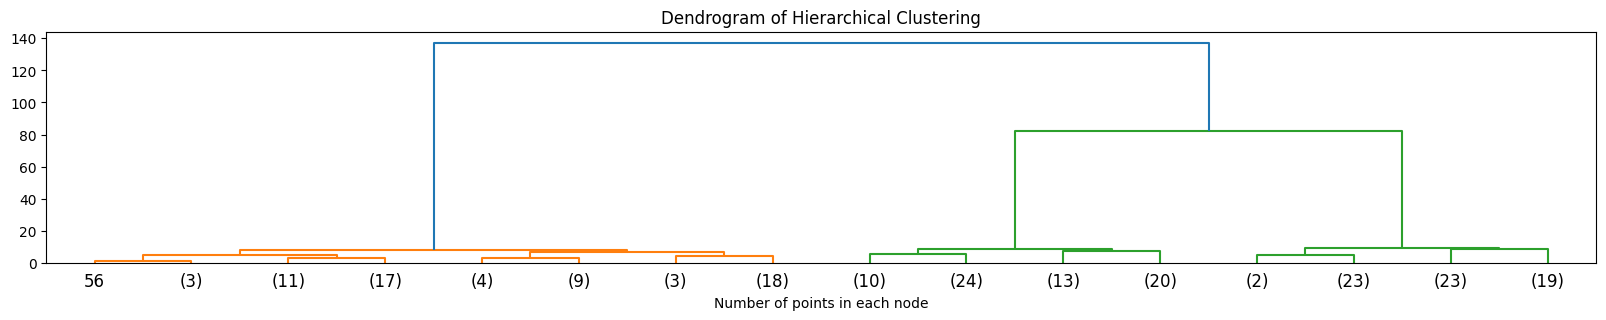

In [2]:
# Apply hierarchical clustering without specifying the number of clusters (to generate dendrogram)
dfX = pd.DataFrame(X, columns=['X1', 'X2'])
cluster = AgglomerativeClustering(n_clusters=None, metric='euclidean', linkage='ward', distance_threshold=0)
cluster.fit(dfX)

# Plot dendrogram
plot_dendrogram(cluster, truncate_mode='level', p=3)
plt.xlabel("Number of points in each node")
plt.title("Dendrogram of Hierarchical Clustering")
plt.show()

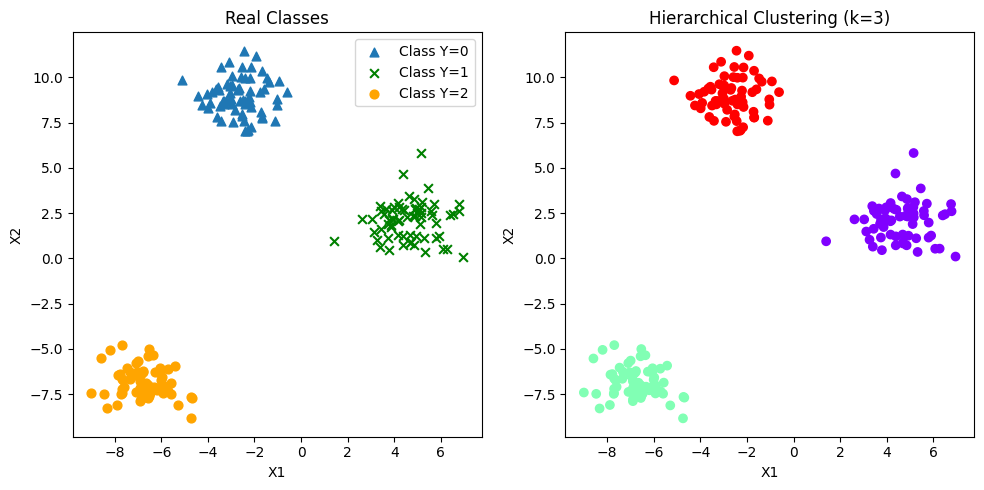

In [3]:
# Apply hierarchical clustering with k=3 (forcing segmentation into 3 clusters)
cluster = AgglomerativeClustering(n_clusters=3, metric='euclidean', linkage='ward')
cluster.fit(dfX)

# Visualization of results
plt.figure(figsize=(10, 5))

# Plot the real classes
plt.subplot(121)
plt.scatter(X[y == 0, 0], X[y == 0, 1], s=40, label="Class Y=0", marker="^")
plt.scatter(X[y == 1, 0], X[y == 1, 1], s=40, label="Class Y=1", c="green", marker="x")
plt.scatter(X[y == 2, 0], X[y == 2, 1], s=40, label="Class Y=2", c="orange", marker="o")
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Real Classes")
plt.legend()

# Plot the clustering result with k=3
plt.subplot(122)
plt.scatter(X[:, 0], X[:, 1], c=cluster.labels_, cmap='rainbow')
plt.xlabel("X1")
plt.ylabel("X2")
plt.title("Hierarchical Clustering (k=3)")

plt.tight_layout()
plt.show()